# **Modelos de aprendizaje**

In [1]:
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [3]:
#Cargamos los datos
data = pd.read_excel("datos.xlsx")
data.head()

,Unnamed: 0,localidad_residencia,ciclovital,sexo,niveleducativo,maltrato_sexual,conflicto_pareja,problemas_economicos,esc_educ,suicidio_amigo,poblacion_diferencial,clasificaciondelaconducta
0,0,Usme,18 – 28 Juventud,Hombre,5. Secundaria incompleta,0,0,0,0,0,Otra,Intento de Suicidio
1,1,Usme,18 – 28 Juventud,Hombre,5. Secundaria incompleta,0,0,0,0,0,Otra,Intento de Suicidio
2,2,Usme,18 – 28 Juventud,Hombre,5. Secundaria incompleta,0,0,0,0,0,Otra,Intento de Suicidio
3,3,Tunjuelito,18 – 28 Juventud,Hombre,5. Secundaria incompleta,0,0,0,0,0,Otra,Ideación suicida
4,4,Usme,18 – 28 Juventud,Mujer,8. Técnico post-secundaria completa,0,0,0,0,0,Otra,Intento de Suicidio


In [4]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279634 entries, 0 to 279633
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 279634 non-null  int64 
 1   localidad_residencia       279634 non-null  object
 2   ciclovital                 279634 non-null  object
 3   sexo                       279634 non-null  object
 4   niveleducativo             279634 non-null  object
 5   maltrato_sexual            279634 non-null  int64 
 6   conflicto_pareja           279634 non-null  int64 
 7   problemas_economicos       279634 non-null  int64 
 8   esc_educ                   279634 non-null  int64 
 9   suicidio_amigo             279634 non-null  int64 
 10  poblacion_diferencial      279634 non-null  object
 11  clasificaciondelaconducta  279634 non-null  object
dtypes: int64(6), object(6)
memory usage: 25.6+ MB


In [6]:
data['localidad_residencia']=data['localidad_residencia'].astype('category')
data['ciclovital']=data['ciclovital'].astype('category')
data['clasificaciondelaconducta']=data['clasificaciondelaconducta'].astype('category')
data['sexo']=data['sexo'].astype('category')
data['niveleducativo']=data['niveleducativo'].astype('category')
data['poblacion_diferencial']=data['poblacion_diferencial'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279634 entries, 0 to 279633
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Unnamed: 0                 279634 non-null  int64   
 1   localidad_residencia       279634 non-null  category
 2   ciclovital                 279634 non-null  category
 3   sexo                       279634 non-null  category
 4   niveleducativo             279634 non-null  category
 5   maltrato_sexual            279634 non-null  int64   
 6   conflicto_pareja           279634 non-null  int64   
 7   problemas_economicos       279634 non-null  int64   
 8   esc_educ                   279634 non-null  int64   
 9   suicidio_amigo             279634 non-null  int64   
 10  poblacion_diferencial      279634 non-null  category
 11  clasificaciondelaconducta  279634 non-null  category
dtypes: category(6), int64(6)
memory usage: 14.4 MB


In [16]:
data = data.drop('Unnamed: 0',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279634 entries, 0 to 279633
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   localidad_residencia       279634 non-null  category
 1   ciclovital                 279634 non-null  category
 2   sexo                       279634 non-null  category
 3   niveleducativo             279634 non-null  category
 4   maltrato_sexual            279634 non-null  int64   
 5   conflicto_pareja           279634 non-null  int64   
 6   problemas_economicos       279634 non-null  int64   
 7   esc_educ                   279634 non-null  int64   
 8   suicidio_amigo             279634 non-null  int64   
 9   poblacion_diferencial      279634 non-null  category
 10  clasificaciondelaconducta  279634 non-null  category
dtypes: category(6), int64(5)
memory usage: 12.3 MB


In [7]:
#Descripcion de variables numericas
data.describe()

,Unnamed: 0,maltrato_sexual,conflicto_pareja,problemas_economicos,esc_educ,suicidio_amigo
count,279634.000000,279634.000000,279634.000000,279634.000000,279634.000000,279634.000000
mean,139816.500000,0.100710,0.266005,0.193782,0.229593,0.023341
std,80723.526925,0.300945,0.441868,0.395261,0.420572,0.150985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69908.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,139816.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,209724.750000,0.000000,1.000000,0.000000,0.000000,0.000000
max,279633.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

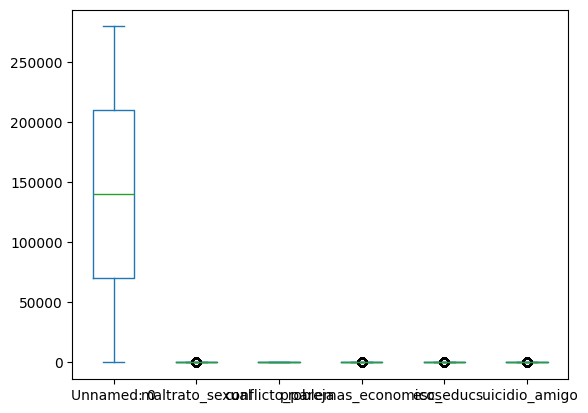

In [8]:
#Descripción variables numérica
data.plot(kind='box')

<Axes: xlabel='localidad_residencia'>

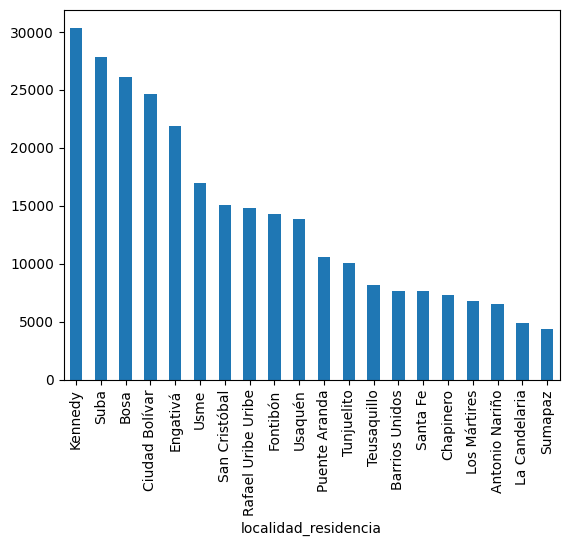

In [9]:
data['localidad_residencia'].value_counts().plot(kind='bar')

<Axes: xlabel='poblacion_diferencial'>

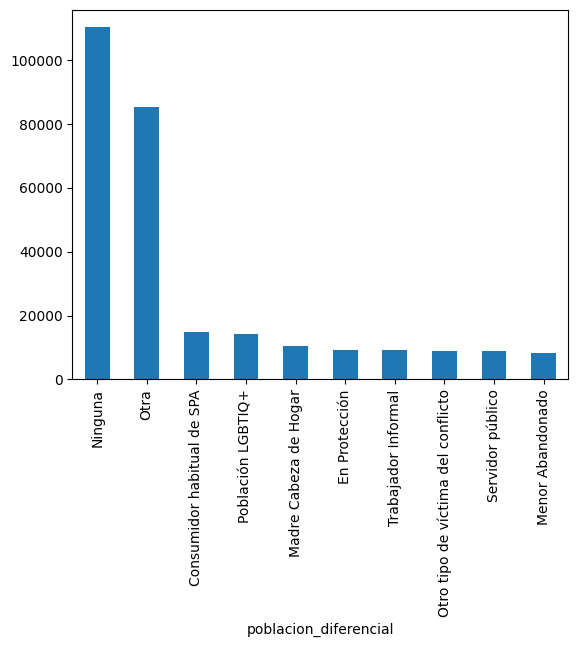

In [10]:
data['poblacion_diferencial'].value_counts().plot(kind='bar')

<Axes: xlabel='niveleducativo'>

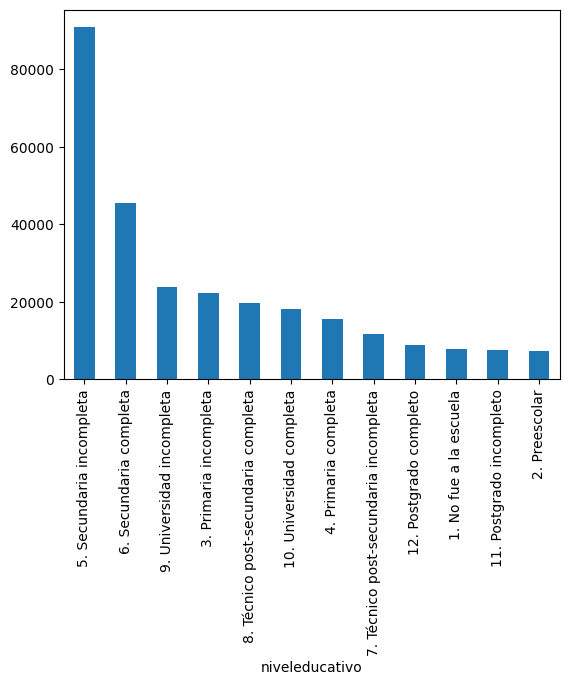

In [11]:
data['niveleducativo'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

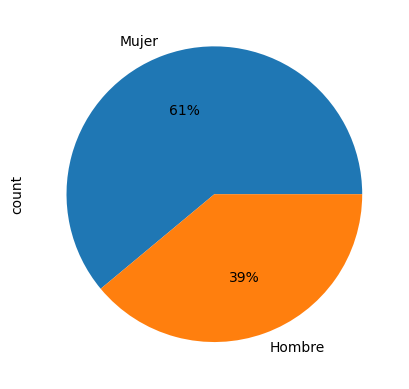

In [12]:
data['sexo'].value_counts().plot(kind='pie', autopct='%.0f%%')

<Axes: xlabel='clasificaciondelaconducta'>

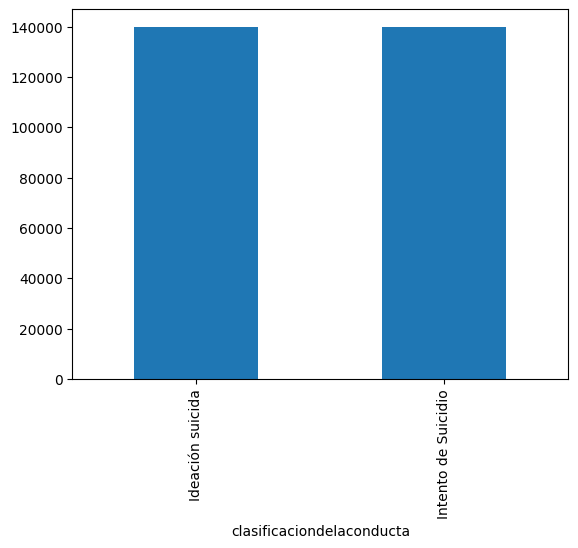

In [13]:
data['clasificaciondelaconducta'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

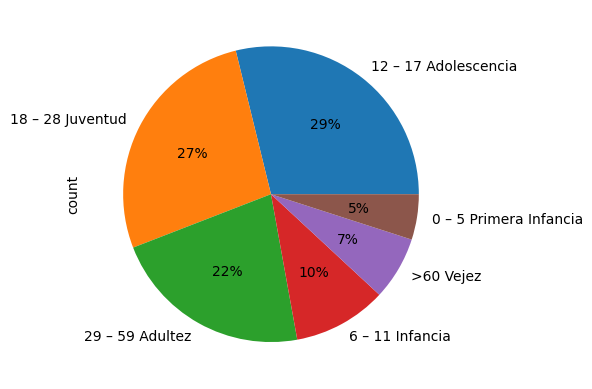

In [14]:
data['ciclovital'].value_counts().plot(kind='pie', autopct='%.0f%%')

#**Arbol de decision**

Tipos de datos en X_train después de la división:
Unnamed: 0               int64
localidad_residencia     int64
ciclovital               int64
sexo                     int64
niveleducativo           int64
maltrato_sexual          int64
conflicto_pareja         int64
problemas_economicos     int64
esc_educ                 int64
suicidio_amigo           int64
poblacion_diferencial    int64
dtype: object

Tipos de datos en y_train después de la división:
int64

Resultados del Modelo de Árbol de Decisión:
Exactitud: 0.7521
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     41946
           1       0.75      0.76      0.75     41945

    accuracy                           0.75     83891
   macro avg       0.75      0.75      0.75     83891
weighted avg       0.75      0.75      0.75     83891



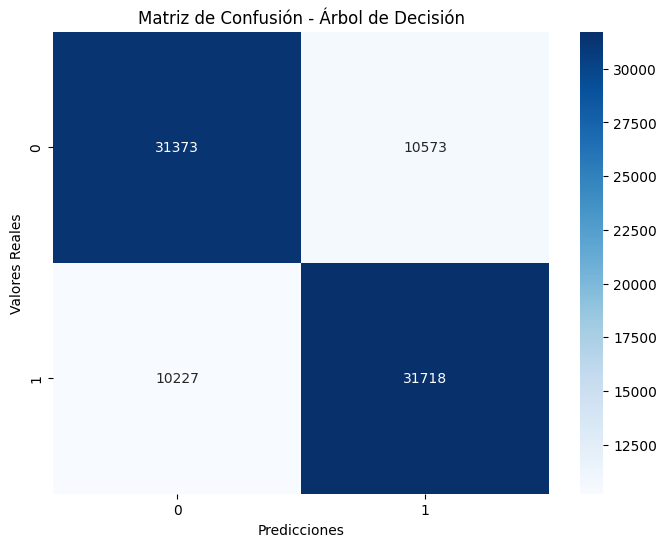

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


# Identificar las columnas categóricas
categorical_cols = ['localidad_residencia', 'ciclovital', 'sexo', 'niveleducativo', 'maltrato_sexual',
                    'conflicto_pareja', 'problemas_economicos', 'esc_educ', 'suicidio_amigo',
                    'poblacion_diferencial']

# Aplicar Label Encoding a cada columna categórica
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# La variable objetivo también es categórica, así que la codificamos
label_encoders['clasificaciondelaconducta'] = LabelEncoder()
data['clasificaciondelaconducta'] = label_encoders['clasificaciondelaconducta'].fit_transform(data['clasificaciondelaconducta'])

# Separar las características (X) de la variable objetivo (y)
X = data.drop('clasificaciondelaconducta', axis=1)
y = data['clasificaciondelaconducta']

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tipos de datos en X_train después de la división:")
print(X_train.dtypes)
print("\nTipos de datos en y_train después de la división:")
print(pd.Series(y_train).dtype)

# Inicializar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el 70% de los datos (conjunto de entrenamiento)
tree_model.fit(X_train, y_train)

# Realizar predicciones con el 30% de los datos (conjunto de prueba)
y_pred_tree = tree_model.predict(X_test)

# Evaluar el modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)

print("\nResultados del Modelo de Árbol de Decisión:")
print(f"Exactitud: {accuracy_tree:.4f}")
print("Informe de Clasificación:\n", report_tree)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#**Analisis de resultados - Arbol de Decision**
El modelo de Árbol de Decisión alcanza una exactitud del 75.21% en el conjunto de prueba. Esta cifra es ligeramente inferior a la exactitud obtenida por el modelo KNN (76.70%) y el modelo Random Forest (77.29%), pero significativamente mejor que la exactitud del modelo de Red Neuronal (67.52%). En términos generales, el modelo de Árbol de Decisión clasifica correctamente aproximadamente el 75.21% de las instancias.

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Obtener el LabelEncoder para la variable objetivo
labelencoder = label_encoders['clasificaciondelaconducta']

# Crear la figura para el gráfico
plt.figure(figsize=(12, 8)) #Ajustar el tamaño de la figura según sea necesario

# Graficar el árbol de decisión
plot_tree(tree_model,
          feature_names=X_train.columns.values,
          class_names=labelencoder.classes_,
          rounded=True,
          filled=True)

# Mostrar el gráfico
plt.show()

KeyboardInterrupt: 

#KNN

Resultados del Modelo KNN:
Exactitud: 0.7670
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78     41946
           1       0.82      0.69      0.75     41945

    accuracy                           0.77     83891
   macro avg       0.77      0.77      0.77     83891
weighted avg       0.77      0.77      0.77     83891



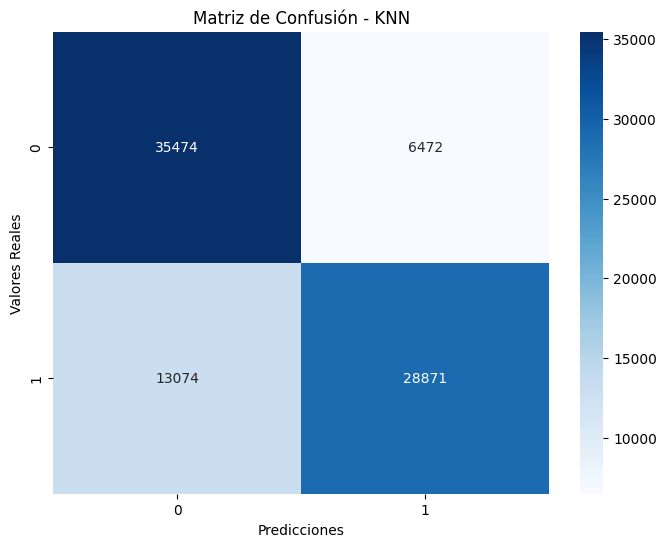

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos (k)

# Entrenar el modelo con el 70% de los datos (conjunto de entrenamiento)
knn_model.fit(X_train, y_train)

# Realizar predicciones con el 30% de los datos (conjunto de prueba)
y_pred_knn = knn_model.predict(X_test)

# Evaluar el modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Resultados del Modelo KNN:")
print(f"Exactitud: {accuracy_knn:.4f}")
print("Informe de Clasificación:\n", report_knn)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#**Analisis de resultados - KNN**
El modelo KNN alcanza una exactitud del 76.70% en el conjunto de prueba. Esta cifra es ligeramente inferior a la exactitud obtenida por el modelo Random Forest (77.29%) pero significativamente mejor que la exactitud del modelo de Red Neuronal (67.52%). En términos generales, el modelo KNN clasifica correctamente aproximadamente el 76.70% de las instancias.

Resultados del Modelo de Red Neuronal:
Exactitud: 0.6752
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.62      0.93      0.74     41946
           1       0.86      0.42      0.56     41945

    accuracy                           0.68     83891
   macro avg       0.74      0.68      0.65     83891
weighted avg       0.74      0.68      0.65     83891



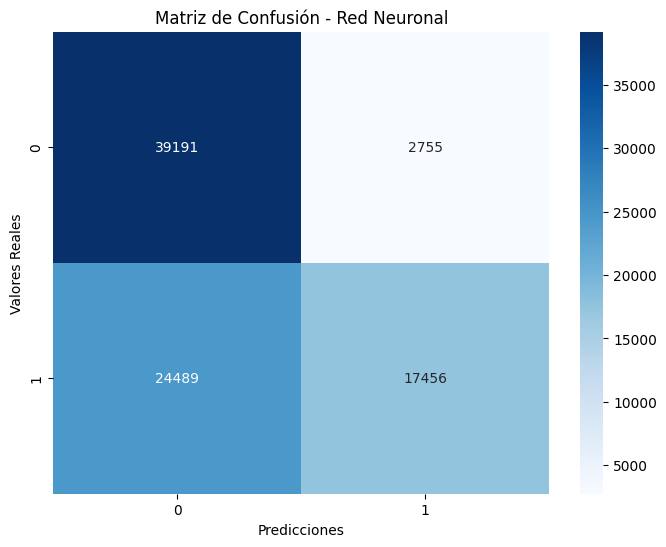

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar el modelo de Red Neuronal (MLPClassifier)
nn_model = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,), activation='relu', solver='adam')

# Entrenar el modelo con el 70% de los datos (conjunto de entrenamiento)
nn_model.fit(X_train, y_train)

# Realizar predicciones con el 30% de los datos (conjunto de prueba)
y_pred_nn = nn_model.predict(X_test)

# Evaluar el modelo
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)

print("Resultados del Modelo de Red Neuronal:")
print(f"Exactitud: {accuracy_nn:.4f}")
print("Informe de Clasificación:\n", report_nn)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Red Neuronal')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#**Analisis de resultados - Red Neuronal**
El modelo de Red Neuronal presenta una exactitud del 67.52% en el conjunto de prueba. Esta cifra es notablemente inferior a la exactitud del modelo Random Forest (77.29%), lo que sugiere que, en términos generales, la Red Neuronal realiza menos predicciones correctas.

#**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar el modelo SVM (Support Vector Classifier)
svm_model = SVC(random_state=42)

# Entrenar el modelo con el 70% de los datos (conjunto de entrenamiento)
svm_model.fit(X_train, y_train)

# Realizar predicciones con el 30% de los datos (conjunto de prueba)
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Resultados del Modelo SVM:")
print(f"Exactitud: {accuracy_svm:.4f}")
print("Informe de Clasificación:\n", report_svm)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#**Random Forest**

Datos cargados y divididos.
Tamaño de X_train: (195743, 11)
Tamaño de X_test: (83891, 11)
Tamaño de y_train: (195743,)
Tamaño de y_test: (83891,)

Resultados del Modelo Random Forest:
Exactitud: 0.7729
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78     41946
           1       0.80      0.73      0.76     41945

    accuracy                           0.77     83891
   macro avg       0.77      0.77      0.77     83891
weighted avg       0.77      0.77      0.77     83891



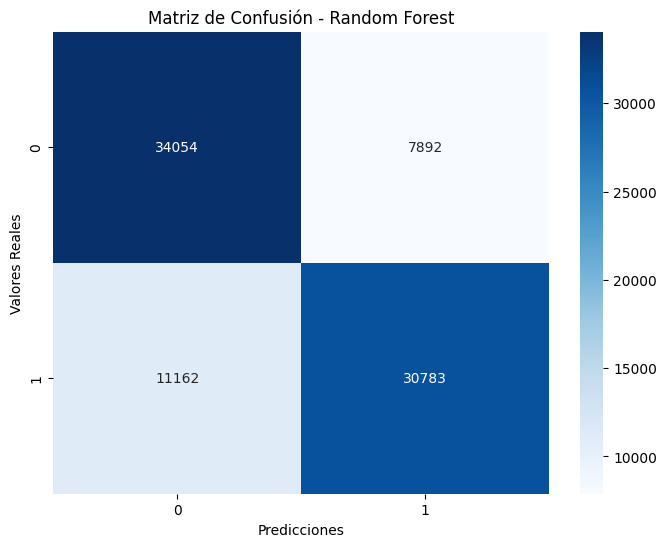

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Identificar las columnas categóricas
categorical_cols = ['localidad_residencia', 'ciclovital', 'sexo', 'niveleducativo', 'maltrato_sexual',
                    'conflicto_pareja', 'problemas_economicos', 'esc_educ', 'suicidio_amigo',
                    'poblacion_diferencial']

# Aplicar Label Encoding a cada columna categórica
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# La variable objetivo también podría ser categórica, así que la codificamos
label_encoders['clasificaciondelaconducta'] = LabelEncoder()
data['clasificaciondelaconducta'] = label_encoders['clasificaciondelaconducta'].fit_transform(data['clasificaciondelaconducta'])

# Separar las características (X) de la variable objetivo (y)
X = data.drop('clasificaciondelaconducta', axis=1)
y = data['clasificaciondelaconducta']

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Datos cargados y divididos.")
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo con el 70% de los datos (conjunto de entrenamiento)
rf_model.fit(X_train, y_train)

# Realizar predicciones con el 30% de los datos (conjunto de prueba)
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nResultados del Modelo Random Forest:")
print(f"Exactitud: {accuracy_rf:.4f}")
print("Informe de Clasificación:\n", report_rf)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#**Analisis de resultados - Random Forest**
El modelo Random Forest muestra un rendimiento aceptable en la tarea de clasificación, con una exactitud del 77.29% en el conjunto de prueba. Esto significa que, en general, el modelo predijo correctamente aproximadamente el 77.29% de las instancias.